# Molecular Similarity

导入数据

In [158]:
import pandas as pd

data = pd.read_csv('smi.tsv', sep='\t')
data

,SMILES
0,NC(Cc1ccc(O)cc1)C(=O)O
1,NC(Cc1ccccc1)C(=O)NC(C(O)C)C(=O)NC(Cc1ccccc1)C...
2,NC([*])C(=O)O
3,NC(C)C(=O)O
4,NC([*])C(=O)NC([*])C(=O)NC(C)C(=O)NCC(=O)NC([*...
...,...
194,NC([*])C(=O)O
195,NCC(=O)NC(C(C)C)C(=O)NC(Cc1ccccc1)C(=O)NC(C(O)...
196,NCC(=O)O
197,NC(C(O)C)C(=O)NC([*])C(=O)NC(CC(=O)N)C(=O)NC([...


In [159]:
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit import DataStructs

mol_list = [Chem.MolFromSmiles(smi) for smi in data.SMILES]
fp_list = [GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024) for mol in mol_list]

In [156]:
def structure_cluster(threshold):
    node1_smi, node2_smi = [], []
    node1_id, node2_id = [], []
    t_ls = []
    for i in data.index:
        for j in range(i):
            tanimoto = DataStructs.TanimotoSimilarity(fp_list[i], fp_list[j])
            if tanimoto >= threshold:
                node1_smi.append(data.SMILES[i])
                node2_smi.append(data.SMILES[j])
                node1_id.append(i)
                node2_id.append(j)
                t_ls.append(tanimoto)
    pd.DataFrame({
        'node1_id': node1_id,
        'node2_id': node2_id,
        'node1_smi': node1_smi,
        'node2)smi': node2_smi,
        'tanimoto': t_ls
    }).to_csv(f'net_t{threshold}.tsv', sep='\t', index=False)

In [157]:
for i in [0.6, 0.7, 0.8, 0.9]:
    structure_cluster(i)

In [160]:
import igraph as ig

g = ig.Graph()
for i in data.index:
    g.add_vertex(name=i)
for i in data.index:
    for j in range(i):
        t = DataStructs.TanimotoSimilarity(fp_list[i], fp_list[j])
        if t >= 0.6:
            g.add_edge(i, j)

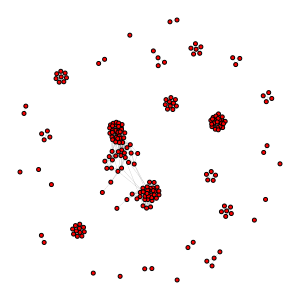

In [161]:
layout = g.layout_graphopt()
visual_style = {}
visual_style["vertex_size"] = 4
visual_style["edge_width"] = 0.1
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
ig.plot(g, **visual_style)
